## Analysis of SVM decision rule for model task

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from pylab import *

In [2]:
def learn_stat(train_data, train_labels, test_data, test_labels, kernel, C):
    svc = SVC(kernel=kernel, C=C)
    svc.fit(train_data, train_labels)
    
    train_score = svc.score(train_data, train_labels)
    test_score = svc.score(test_data, test_labels)
    supporting_vectors = svc.support_vectors_
    
    return train_score, test_score, len(supporting_vectors)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_stat(train_data, train_labels, test_data, test_labels, kernel, minC, maxC, steps):
    points = np.logspace(np.log(minC), np.log(maxC), base=np.e, num=steps)
    
    train_scores = np.array([])
    test_scores = np.array([])
    vector_nums = np.array([])
    for point in points:
        data = learn_stat(train_data, train_labels, test_data, test_labels, kernel, point)
        
        train_scores = np.insert(train_scores, len(train_scores), data[0])
        test_scores = np.insert(test_scores, len(test_scores), data[1])
        vector_nums = np.insert(vector_nums, len(vector_nums), data[2])
    
#     plt.plot(train_scores, points, 'ro', test_scores, points, 'go', vector_nums, points, 'bo')
#     fig = plt.figure()

    subplot(4,1,1)
    plot(train_scores, points, 'ro')
    subplot(4,1,2)
    plot(test_scores, points, 'go')
    subplot(4,1,3)
    plot(vector_nums, points, 'bo')

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_support(train_data, train_labels, test_data, test_labels, kernel, C):

    clf = svm.SVC(kernel=kernel, C=C)
    clf.fit(train_data, train_labels)
    fignum = 1
    
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(5, 5))
    plt.clf()
    
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = np.min(x_train) - 1
    x_max = np.max(x_train)
    y_min = np.min(x_train) - 1
    y_max = np.max(x_train) + 1
    
    
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    
    
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

#     plt.xlim(x_min, x_max)
#     plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
    plt.show()

In [4]:
synth_train = pd.read_csv('synth_train.csv').as_matrix()
synth_test = pd.read_csv('synth_test.csv').as_matrix()

In [5]:
y_train = synth_train[:, 0]
x_train = synth_train[:, [1, 2]]

y_test = synth_test[:, 0]
x_test = synth_test[:, [1, 2]]

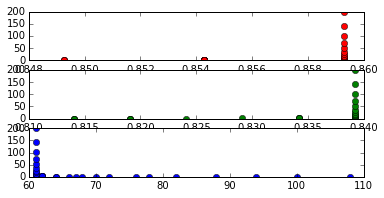

In [6]:
plot_stat(x_train, y_train, x_test, y_test, 'linear', .01, 200, 30)

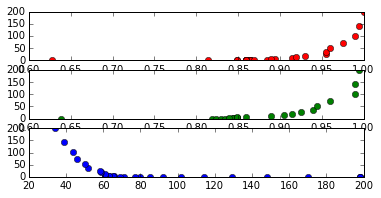

In [7]:
plot_stat(x_train, y_train, x_test, y_test, 'rbf', .01, 200, 30)

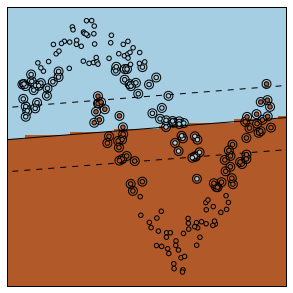

Train score is: 0.859296482412; 
Test score: 0.814070351759; 
SP number: 108


In [10]:
plot_support(x_train, y_train, x_test, y_test, 'linear', 0.01)
print 'Train score is: %s; \nTest score: %s; \nSP number: %s' % learn_stat(x_train, y_train, x_test, y_test, 'linear', 0.01)

### Best C for linear kernel

In [11]:
# Finding the best C for linear kernel:
c_values = np.logspace(np.log(0.01), np.log(200), base=np.e, num=50)

max_test_score = 0
best_c_linear = None

for c in c_values:
    print 'c is: %s\n' % c
    result = learn_stat(x_train, y_train, x_test, y_test, 'linear', c)
    
    if result[1] > max_test_score:
        max_test_score = result[1]
        best_c_linear = c
    
    print 'Train score is: %s; \nTest score: %s; \nSP number: %s' % result
    print '\n'

print '\n'
print 'Best c is: %s with test_score: %s' % (best_c_linear, max_test_score)

c is: 0.01

Train score is: 0.859296482412; 
Test score: 0.814070351759; 
SP number: 108


c is: 0.0122398507559

Train score is: 0.854271356784; 
Test score: 0.814070351759; 
SP number: 102


c is: 0.0149813946526

Train score is: 0.854271356784; 
Test score: 0.814070351759; 
SP number: 98


c is: 0.0183370034663

Train score is: 0.859296482412; 
Test score: 0.814070351759; 
SP number: 94


c is: 0.0224442185737

Train score is: 0.854271356784; 
Test score: 0.814070351759; 
SP number: 92


c is: 0.0274713885674

Train score is: 0.849246231156; 
Test score: 0.819095477387; 
SP number: 88


c is: 0.0336245696122

Train score is: 0.849246231156; 
Test score: 0.824120603015; 
SP number: 84


c is: 0.0411559713784

Train score is: 0.849246231156; 
Test score: 0.819095477387; 
SP number: 82


c is: 0.0503742947384

Train score is: 0.844221105528; 
Test score: 0.819095477387; 
SP number: 80


c is: 0.061657384953

Train score is: 0.854271356784; 
Test score: 0.819095477387; 
SP number: 78




Best c for linear is: 1.27828277458 with test_score: 0.839195979899

### Best C value for RBG kernel

In [12]:
# Finding the best C for RBF kernel:
c_values = np.logspace(np.log(0.01), np.log(200), base=np.e, num=50)

max_test_score = 0
best_c_rbf = None

for c in c_values:
    print 'c is: %s\n' % c
    result = learn_stat(x_train, y_train, x_test, y_test, 'rbf', c)
    
    if result[1] > max_test_score:
        max_test_score = result[1]
        best_c_rbf = c
    
    print 'Train score is: %s; \nTest score: %s; \nSP number: %s' % result
    print '\n'

print '\n'
print 'Best c is: %s with test_score: %s' % (best_c_rbf, max_test_score)

c is: 0.01

Train score is: 0.628140703518; 
Test score: 0.638190954774; 
SP number: 198


c is: 0.0122398507559

Train score is: 0.788944723618; 
Test score: 0.793969849246; 
SP number: 198


c is: 0.0149813946526

Train score is: 0.824120603015; 
Test score: 0.809045226131; 
SP number: 198


c is: 0.0183370034663

Train score is: 0.849246231156; 
Test score: 0.819095477387; 
SP number: 198


c is: 0.0224442185737

Train score is: 0.849246231156; 
Test score: 0.829145728643; 
SP number: 187


c is: 0.0274713885674

Train score is: 0.849246231156; 
Test score: 0.829145728643; 
SP number: 170


c is: 0.0336245696122

Train score is: 0.86432160804; 
Test score: 0.829145728643; 
SP number: 158


c is: 0.0411559713784

Train score is: 0.86432160804; 
Test score: 0.834170854271; 
SP number: 146


c is: 0.0503742947384

Train score is: 0.859296482412; 
Test score: 0.839195979899; 
SP number: 133


c is: 0.061657384953

Train score is: 0.859296482412; 
Test score: 0.834170854271; 
SP number: 

Best c for RBF is: 163.400685179 with test_score: 0.994974874372

### Testing linear kernel

#### Testing with inadequately small C (0.01)

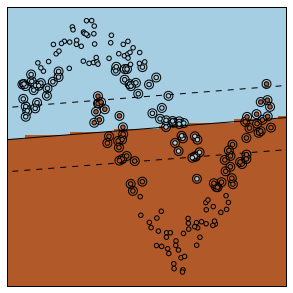

Train score is: 0.859296482412; 
Test score: 0.814070351759; 
SP number: 108


In [13]:
plot_support(x_train, y_train, x_test, y_test, 'linear', 0.01)
result = learn_stat(x_train, y_train, x_test, y_test, 'linear', 0.01)
print 'Train score is: %s; \nTest score: %s; \nSP number: %s' % result

On this value of C penalty of wrong classification is too low so support vectors stay far away from desicion boundary.
Low cost of missclassification allows to ignore big amount of points. So, desire of classificator to set vectors far away from DB is not interrupted by penalty.

#### Testing with inadequately huge C (200)

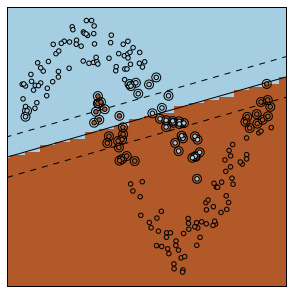

Train score is: 0.859296482412; 
Test score: 0.839195979899; 
SP number: 61


In [14]:
plot_support(x_train, y_train, x_test, y_test, 'linear', 200)
result = learn_stat(x_train, y_train, x_test, y_test, 'linear', 200)
print 'Train score is: %s; \nTest score: %s; \nSP number: %s' % result

This value of C makes classificator minimize number of missclassification due to too big penalty for it. 
Such value improves a bit test score, but not much more. Due to non-linear type of dependency, it is impossible to make such linear kernel that would classify dataset well. Missclassificated points are not part of noise, but part of complicated dependency, so even rather big value of test score can mislead user.

#### Testing with optimal C (1.2782)

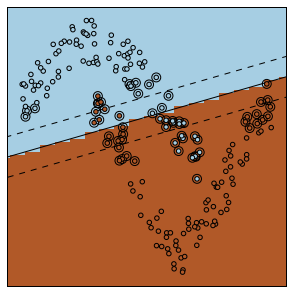

Train score is: 0.859296482412; 
Test score: 0.839195979899; 
SP number: 62


In [15]:
plot_support(x_train, y_train, x_test, y_test, 'linear', best_c_linear)
result = learn_stat(x_train, y_train, x_test, y_test, 'linear', best_c_linear)
print 'Train score is: %s; \nTest score: %s; \nSP number: %s' % result

It is clear that test score looks mostly same for small, huge and "optimal" C value.
So, for this dataset C variable does not affect because lineal kernel is inappropriate for this dataset.

### Testing rbf kernel

#### Testing with inadequately small C (0.01)

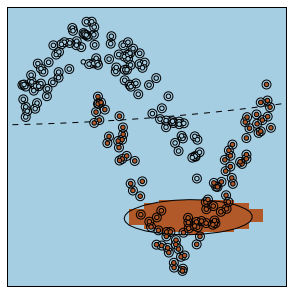

Train score is: 0.628140703518; 
Test score: 0.638190954774; 
SP number: 198


In [16]:
plot_support(x_train, y_train, x_test, y_test, 'rbf', 0.01)
result = learn_stat(x_train, y_train, x_test, y_test, 'rbf', 0.01)
print 'Train score is: %s; \nTest score: %s; \nSP number: %s' % result

Value of C it too low for this type of kernel. Low penalty for missclassification and complicated trend of data allows to fit a lot of wrong data and maximize scores.

#### Testing with inadequately huge C (200)

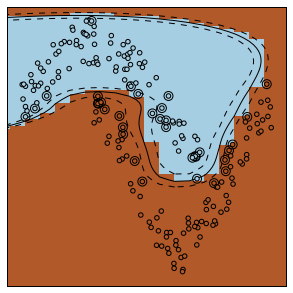

Train score is: 1.0; 
Test score: 0.994974874372; 
SP number: 34


In [17]:
plot_support(x_train, y_train, x_test, y_test, 'rbf', 200)
result = learn_stat(x_train, y_train, x_test, y_test, 'rbf', 200)
print 'Train score is: %s; \nTest score: %s; \nSP number: %s' % result

The best C value for RBF is big number because classificator has wider amount of solutions and high penalty makes it
find more complicated vectors.

#### Testing with optimal C (163.4)

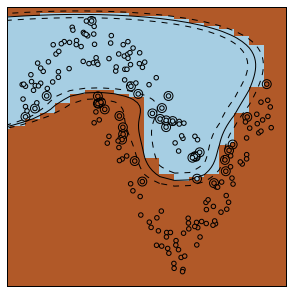

Train score is: 0.994974874372; 
Test score: 0.994974874372; 
SP number: 36


In [18]:
plot_support(x_train, y_train, x_test, y_test, 'rbf', 163.4)
result = learn_stat(x_train, y_train, x_test, y_test, 'rbf', 163.4)
print 'Train score is: %s; \nTest score: %s; \nSP number: %s' % result

Optimal C is close to high C and behaves in same way.

## Implementing kernel for strings

In [19]:
en_file = 'en.txt'
fr_file = 'fr.txt'

with open(en_file) as en_f:
    en = np.array(en_f.read().splitlines())

with open(fr_file) as fr_f:
    fr = np.array(fr_f.read().splitlines())

In [20]:
from sklearn.utils import shuffle

In [21]:
# Shuffling arrays because of similar words at the beginning of files
en = shuffle(en)
fr = shuffle(fr)

In [28]:
en = en[:300]
fr = fr[:300]

words = np.concatenate((en, fr), axis=0)
labels = np.concatenate((np.zeros(300, dtype=int), np.ones(300, dtype=int)))
labels[:300] = 0
labels[300:] = 1

import sklearn as skl

indices = np.arange(600, dtype=int)
indices = np.reshape(indices, (600,1))

train_data, test_data, train_labels, test_labels = skl.cross_validation.train_test_split(indices, labels, test_size=3.0 / 8)

In [24]:
def string_kernel(X_indexes, Y_indexes):
    result = np.zeros(shape=(X_indexes.shape[0], Y_indexes.shape[0]),dtype=int)
    
    i = 0;
    for x_idx in X_indexes:
        j = 0;
        for y_idx in Y_indexes:
            result[i][j] = levenstein_distance(words[int(x_idx)], words[int(y_idx)])
            j += 1
        i += i
    
    return result


# algorithm is taken from wikibooks 
def levenstein_distance(source, target):
    if len(target) == 0:
        return len(source)
    
    previous_row = np.arange(target.size + 1)
    for s in source:
        # Insertion (target grows longer than source):
        current_row = previous_row + 1

        # Substitution or matching:
        # Target and source items are aligned, and either
        # are different (cost of 1), or are the same (cost of 0).
        current_row[1:] = np.minimum(
                current_row[1:],
                np.add(previous_row[:-1], target != s))

        # Deletion (target grows shorter than source):
        current_row[1:] = np.minimum(
                current_row[1:],
                current_row[0:-1] + 1)

        previous_row = current_row

    return previous_row[-1]

In [31]:
# Finding the best C for String kernel:
c_values = np.logspace(np.log(0.01), np.log(200), base=np.e, num=15)

max_test_score = 0
best_c = None

for c in c_values:
    print 'c is: %s\n' % c
    result = learn_stat(train_data, train_labels, test_data, test_labels, string_kernel, c)
    
    if result[1] > max_test_score:
        max_test_score = result[1]
        best_c_rbf = c
    
    print 'Train score is: %s; \nTest score: %s; \nSP number: %s' % result
    print '\n'

print '\n'
print 'Best c is: %s with test_score: %s' % (best_c_rbf, max_test_score)

c is: 0.01

Train score is: 0.512; 
Test score: 0.48; 
SP number: 0


c is: 0.0202869345586

Train score is: 0.512; 
Test score: 0.48; 
SP number: 0


c is: 0.0411559713784

Train score is: 0.512; 
Test score: 0.48; 
SP number: 0


c is: 0.0834928498047

Train score is: 0.512; 
Test score: 0.48; 
SP number: 0


c is: 0.16938139801

Train score is: 0.512; 
Test score: 0.48; 
SP number: 0


c is: 0.343622933686

Train score is: 0.512; 
Test score: 0.48; 
SP number: 0


c is: 0.697105596851

Train score is: 0.512; 
Test score: 0.48; 
SP number: 0


c is: 1.41421356237

Train score is: 0.509333333333; 
Test score: 0.48; 
SP number: 0


c is: 2.86900579917

Train score is: 0.509333333333; 
Test score: 0.48; 
SP number: 0


c is: 5.82033328959

Train score is: 0.509333333333; 
Test score: 0.48; 
SP number: 0


c is: 11.8076720555

Train score is: 0.509333333333; 
Test score: 0.48; 
SP number: 0


c is: 23.9541470279

Train score is: 0.509333333333; 
Test score: 0.48; 
SP number: 0


c is: 48

The main problem is that dataset it too small.